<h1 style="text-align: center;">Customer Churn Prediction</h1>


In [206]:
# Importing Necessary Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Load the dataset.

In [207]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns',None)

In [208]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

In [209]:
# Checking dimensions
df.shape

(7043, 21)

In [210]:
print(f'No.of Rows: {df.shape[0]}')
print(f'No.of Columns: {df.shape[1]}')

No.of Rows: 7043
No.of Columns: 21


In [211]:
# Checking dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [212]:
# Droping "Customer ID" column 
df.drop('customerID',axis=1,inplace=True)

In [213]:
# Checking columns names
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [214]:
# Check for any Null/Missing values.
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no missing value in the dataset.

In [215]:
# Checking the frequency of gender column.
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [216]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [217]:
for col in df.columns:
    if col not in ['tenure','MonthlyCharges','TotalCharges']:
        print(col,':', df[col].unique()) 
        print('------------------------------------------')

gender : ['Female' 'Male']
------------------------------------------
SeniorCitizen : [0 1]
------------------------------------------
Partner : ['Yes' 'No']
------------------------------------------
Dependents : ['No' 'Yes']
------------------------------------------
PhoneService : ['No' 'Yes']
------------------------------------------
MultipleLines : ['No phone service' 'No' 'Yes']
------------------------------------------
InternetService : ['DSL' 'Fiber optic' 'No']
------------------------------------------
OnlineSecurity : ['No' 'Yes' 'No internet service']
------------------------------------------
OnlineBackup : ['Yes' 'No' 'No internet service']
------------------------------------------
DeviceProtection : ['No' 'Yes' 'No internet service']
------------------------------------------
TechSupport : ['No' 'Yes' 'No internet service']
------------------------------------------
StreamingTV : ['No' 'Yes' 'No internet service']
------------------------------------------
StreamingMo

In [218]:
for col in ['tenure','MonthlyCharges','TotalCharges']:
    print(col,':', len(df[df[col]==' '])) 
    print('------------------------------------------')

tenure : 0
------------------------------------------
MonthlyCharges : 0
------------------------------------------
TotalCharges : 11
------------------------------------------


In [219]:
# Replace blank spaces with 0.
df['TotalCharges'] = df['TotalCharges'].replace({" ":"0.0"}).astype(float)

In [220]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Dataset is quiet imbalance.

In [221]:
# Descriptive Analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [222]:
# Define user function to plot the distribution and boxplot.
def plot_distribution(df, column_name):
    plt.figure(figsize=(12,4)) 
    plt.subplot(1,2,1)
    sns.histplot(df[column_name],kde=True)
    plt.title(f'Distribution of {column_name}')

    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    plt.axvline(col_mean,color='red',linestyle='--',label='Mean')
    plt.axvline(col_median,color='blue',linestyle='--',label='Median')

    plt.legend()

    plt.subplot(1,2,2)
    sns.boxplot(y=df[column_name])
    plt.title(f'Boxplot of {column_name}')
    plt.show()

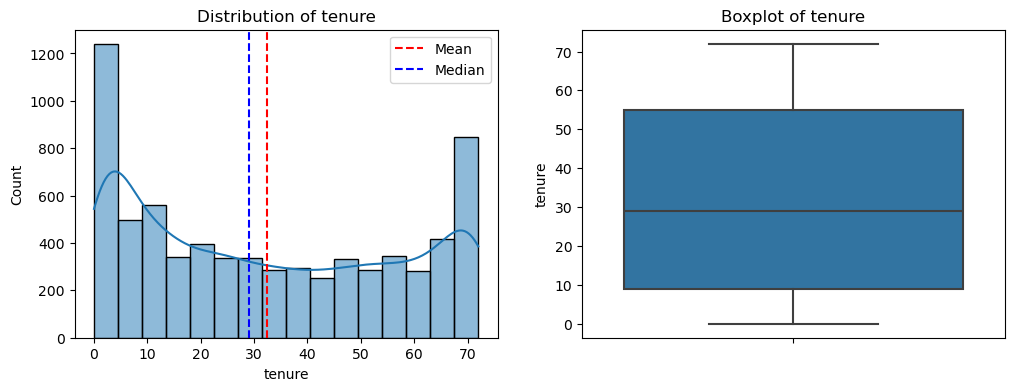

In [223]:
plot_distribution(df,'tenure')

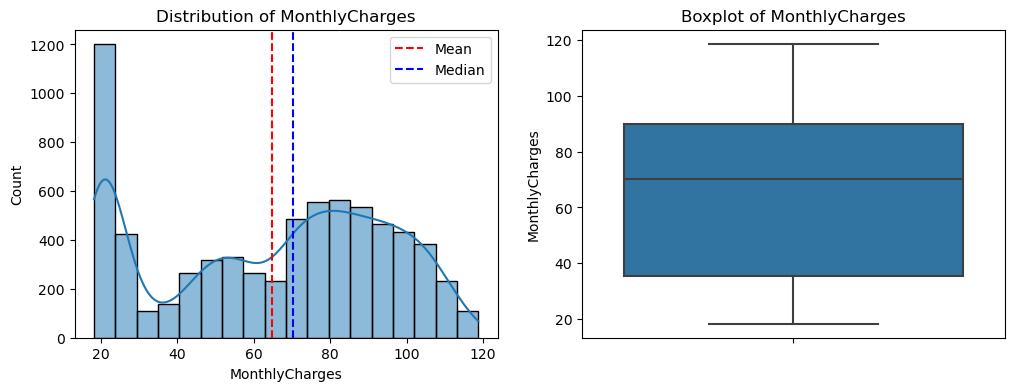

In [224]:
plot_distribution(df,'MonthlyCharges')

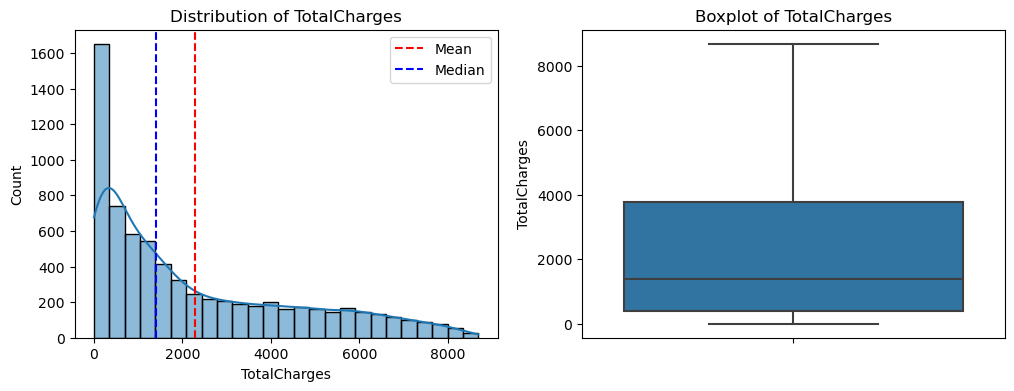

In [225]:
plot_distribution(df,'TotalCharges')

In [226]:
# Checking the correaltion.
df[['tenure','TotalCharges','MonthlyCharges']].corr()

,tenure,TotalCharges,MonthlyCharges
tenure,1.000000,0.826178,0.247900
TotalCharges,0.826178,1.000000,0.651174
MonthlyCharges,0.247900,0.651174,1.000000


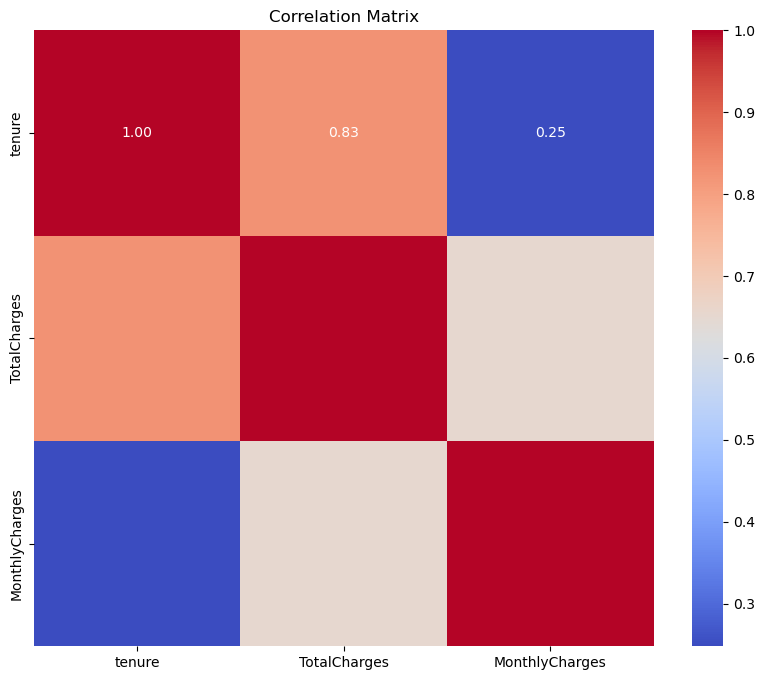

In [227]:
# Plot heatmap for the correlation.
plt.figure(figsize = (10,8))
sns.heatmap(df[['tenure','TotalCharges','MonthlyCharges']].corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

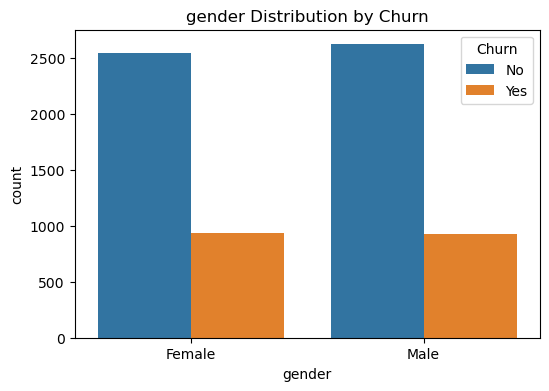

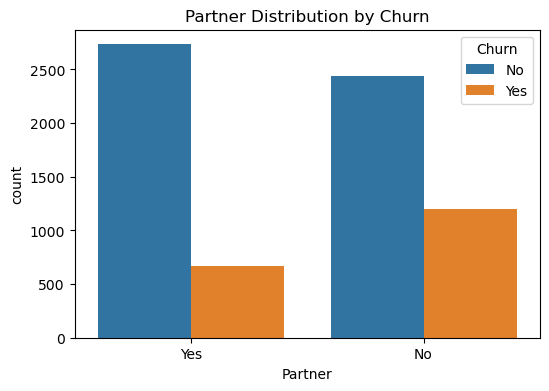

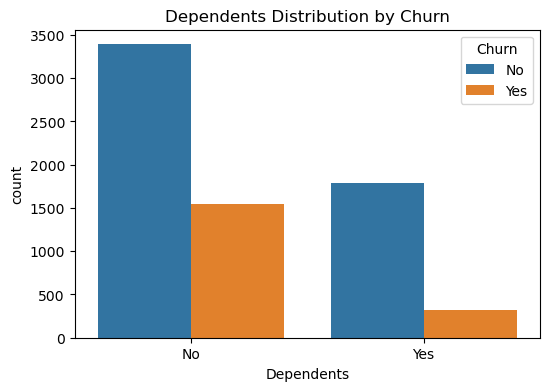

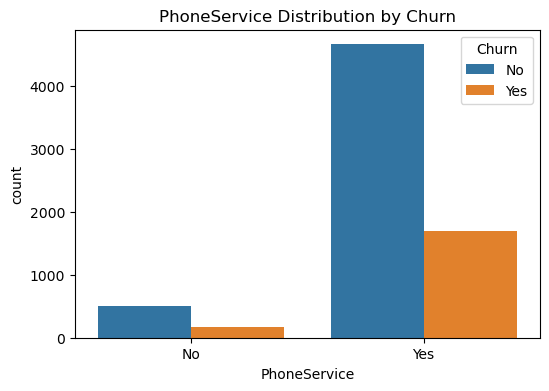

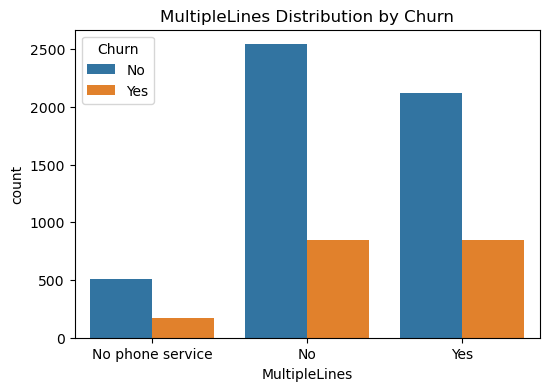

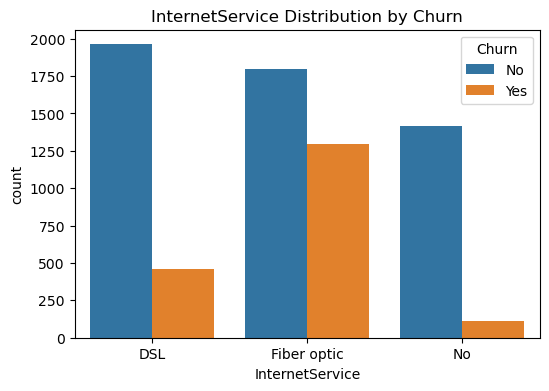

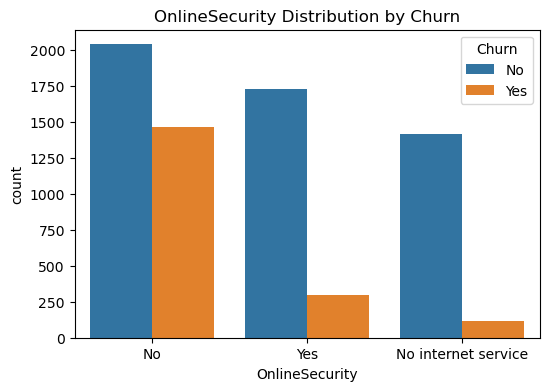

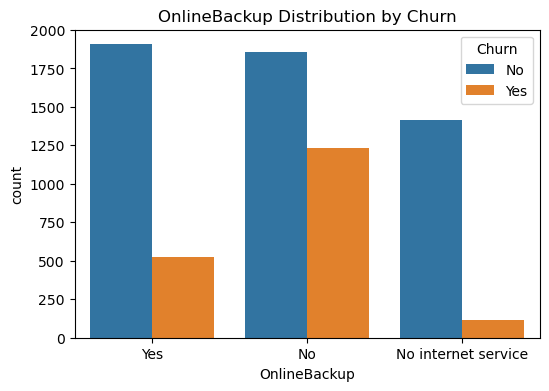

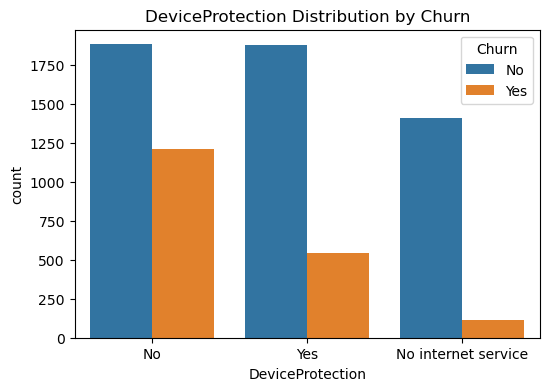

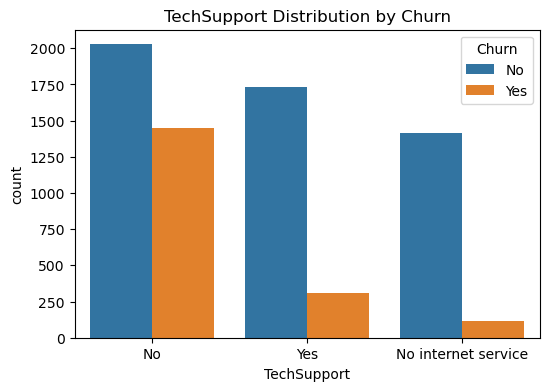

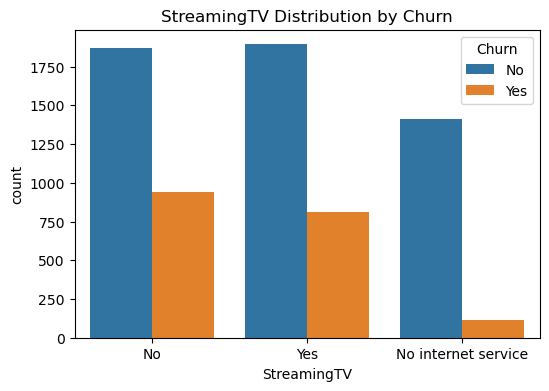

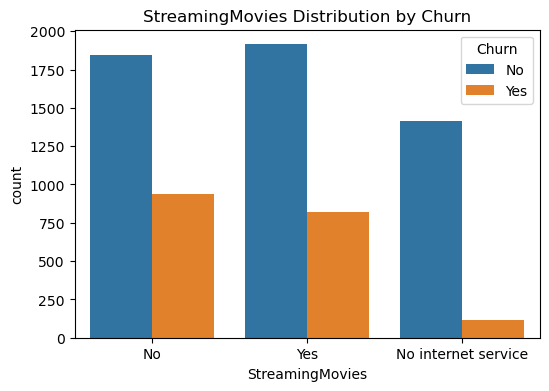

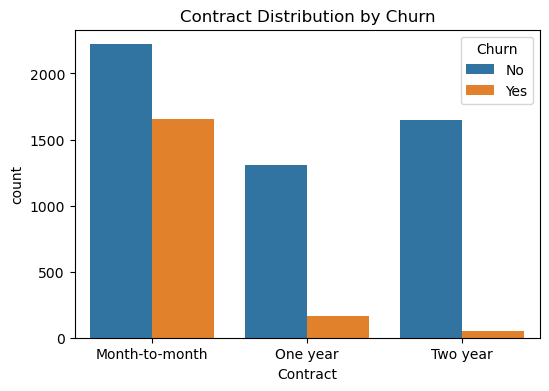

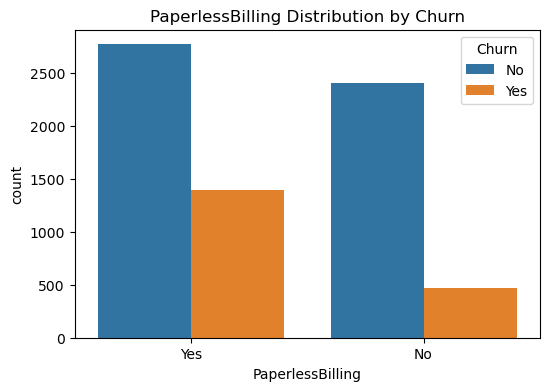

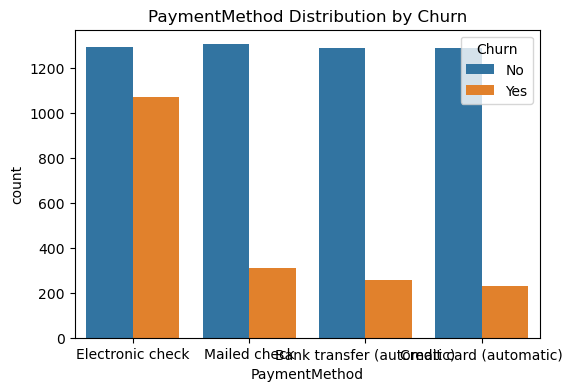

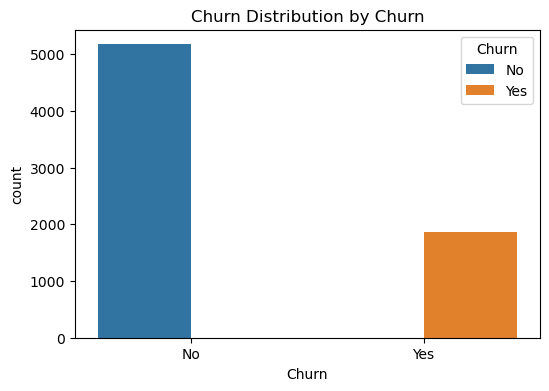

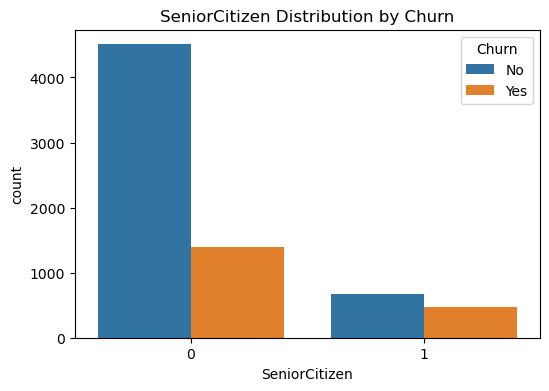

In [228]:
# Countplot of all categorical features on the basis of churn.
categorical_cols = df.select_dtypes(include='object').columns.to_list() + ['SeniorCitizen']
for index,col in enumerate(categorical_cols,1):
    plt.figure(figsize=(6,4))
    sns.countplot(data=df,x=col,hue='Churn')
    plt.title(f'{col} Distribution by Churn')
    plt.show()

In [229]:
# Convert Churn values into 0 and 1.
df['Churn'] = df['Churn'].replace({'No':0,'Yes':1})

In [230]:
# Do Label Encoding for object data-type features.
objects_columns = df.select_dtypes(include='object').columns

In [231]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in objects_columns:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    encoders[col] = label_encoder

In [232]:
encoders


{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [233]:
import pickle
with open('encoder.pkl','wb') as f:
    pickle.dump(encoders,f)

In [234]:
from sklearn.preprocessing import StandardScaler

In [235]:
numerical_columns =['tenure','MonthlyCharges','TotalCharges'] 
ss = StandardScaler()
df[numerical_columns] = ss.fit_transform(df[numerical_columns])

In [236]:
# Importing Machine Learning Models
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [237]:
x = df.drop('Churn',axis=1)
y = df['Churn']

In [238]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [239]:
y_train.value_counts()

Churn
0    4138
1    1496
Name: count, dtype: int64

In [240]:
# Balancing the dataset. 
smote = SMOTE(random_state=42)

In [241]:
x_train_smote, y_train_smote = smote.fit_resample(x_train,y_train)

In [242]:
y_train_smote.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

In [243]:
models = {
    "Random Forest Classifier" : RandomForestClassifier(random_state=42),
    "XGBoost" : XGBClassifier()
}

In [244]:
hyperparameters = {
        "Random Forest Classifier" : {
                    "n_estimators" : [50,100,200],
                    "max_depth" : [5,10,None]
                    },
        "XGBoost" : {
                    "learning_rate" : [0.01,0.1,0.2],
                    "max_depth" : [3,5,7]
        }
}

In [245]:
best_model = {}
for model_name, model in models.items():
    print(f'Tuning {model_name}........')
    grid = GridSearchCV(estimator=model, param_grid=hyperparameters[model_name],cv=3 ,scoring= 'accuracy')
    grid.fit(x_train_smote,y_train_smote)
    best_model[model_name] = grid.best_estimator_
    print(f'Best parameter for  {model_name} : {grid.best_params_}')
    print(f'Best Accuracy for {model_name} : {grid.best_score_: .2f}\n')

Tuning Random Forest Classifier........
Best parameter for  Random Forest Classifier : {'max_depth': None, 'n_estimators': 100}
Best Accuracy for Random Forest Classifier :  0.83

Tuning XGBoost........
Best parameter for  XGBoost : {'learning_rate': 0.2, 'max_depth': 7}
Best Accuracy for XGBoost :  0.81



In [246]:
with open('best_model.pkl',"wb") as f:
    pickle.dump(best_model["Random Forest Classifier"],f)

In [247]:
with open("scaler.pkl",'wb') as f:
    pickle.dump(ss,f)

In [248]:
y_test_pred = best_model['Random Forest Classifier'].predict(x_test)
y_test_prob = best_model['Random Forest Classifier'].predict_proba(x_test)[:,1]

In [249]:
y_test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [250]:
y_test_prob

array([0.92, 0.35, 0.02, ..., 0.01, 0.04, 0.38])

In [251]:
print(f'Accuracy :', accuracy_score(y_test,y_test_pred))
print(f'ROC - AUC Score :', roc_auc_score(y_test,y_test_pred))
print(f'Confusion Matrix :\n', confusion_matrix(y_test,y_test_pred))
print(f'Classification Report :\n', classification_report(y_test,y_test_pred))

Accuracy : 0.7778566359119943
ROC - AUC Score : 0.7374168020950862
Confusion Matrix :
 [[853 183]
 [130 243]]
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1036
           1       0.57      0.65      0.61       373

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



In [252]:
with open('best_model.pkl','rb') as f:
    loaded_model = pickle.load(f)
with open('encoder.pkl','rb') as f:
    encoders = pickle.load(f)
with open('scaler.pkl','rb') as f:
    scaler_data = pickle.load(f)

In [253]:
def make_prediction(input_data):
    input_df = pd.DataFrame([input_data])
    for col, encoder in encoders.items():
        input_df[col] = encoder.transform(input_df[col])
    numerical_columns = ['tenure','MonthlyCharges','TotalCharges']
    input_df[numerical_columns] = scaler_data.transform(input_df[numerical_columns])
    prediction = loaded_model.predict(input_df)[0]
    probablity = loaded_model.predict_proba(input_df)[0,1]
    return 'Churn' if prediction == 1 else 'No Churn', probablity

In [255]:
example_input = {
    'gender' : 'Female',
    'SeniorCitizen' : 0,
    'Partner' : 'Yes',
    'Dependents' : 'No',
    'tenure' : 1,
    'PhoneService' : 'No',
    'MultipleLines' : 'No phone service',
    'InternetService' : 'DSL',
    'OnlineSecurity' : 'No',
    'OnlineBackup' : 'Yes',
    'DeviceProtection' : 'No',
    'TechSupport' : 'No', 
    'StreamingTV' : 'No',
    'StreamingMovies' : 'No',
    'Contract' :'Month-to-month',
    'PaperlessBilling' :'Yes', 
    'PaymentMethod' :'Electronic check',
    'MonthlyCharges' :29.85, 
    'TotalCharges' :29.85
}

In [256]:
prediction, prob = make_prediction(example_input)

In [260]:
print(f'Prediction : {prediction} ,Probability : {prob: .2f}')

Prediction : No Churn ,Probability :  0.27
